<a href="https://colab.research.google.com/github/SerahSoltani/Top-Deep-Learning-Interview-Questions-and-Answers/blob/main/CNN_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"Select 10 images from the CIFAR-10 dataset. Design two 3x3 filters that have a value of 1 only on the diagonals and zero in the rest of the pixels. Apply these two filters to all ten images and display the images before and after applying each filter in one graph."

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

In [9]:
# Step 1: Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Step 2: Select 10 images from the dataset
images = x_test[:10]

In [10]:
# Step 3: Define the filters
filter_1 = np.array([[1, 0, 0],
                     [0, 1, 0],
                     [0, 0, 1]])

filter_2 = np.array([[0, 0, 1],
                     [0, 1, 0],
                     [1, 0, 0]])

# Ensure the filters have the correct shape
filters = np.stack([filter_1, filter_2], axis=-1)
filters = np.repeat(filters[..., np.newaxis, :], 3, axis=2)  # Create depth dimension
filters = filters.transpose((0, 1, 2, 3))  # Ensure correct shape


In [11]:
# Step 4: Create a simple model to apply the filters
model = Sequential([
    Conv2D(2, (3, 3), input_shape=(32, 32, 3), weights=[filters, np.array([0, 0])], trainable=False)
])

# Step 5: Apply the filters to the images
filtered_images = model.predict(images)

1/1 [==============================] - 0s 307ms/step


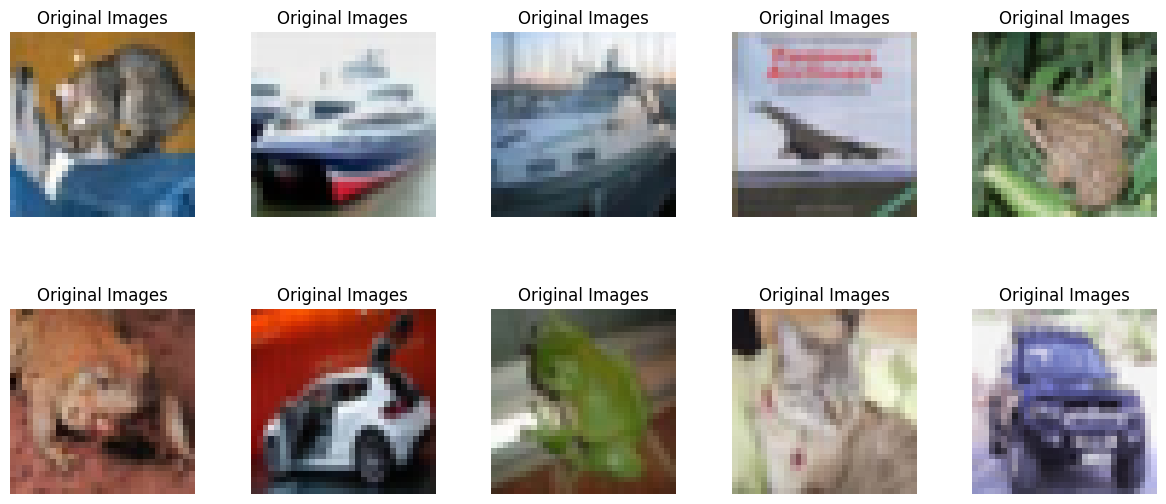

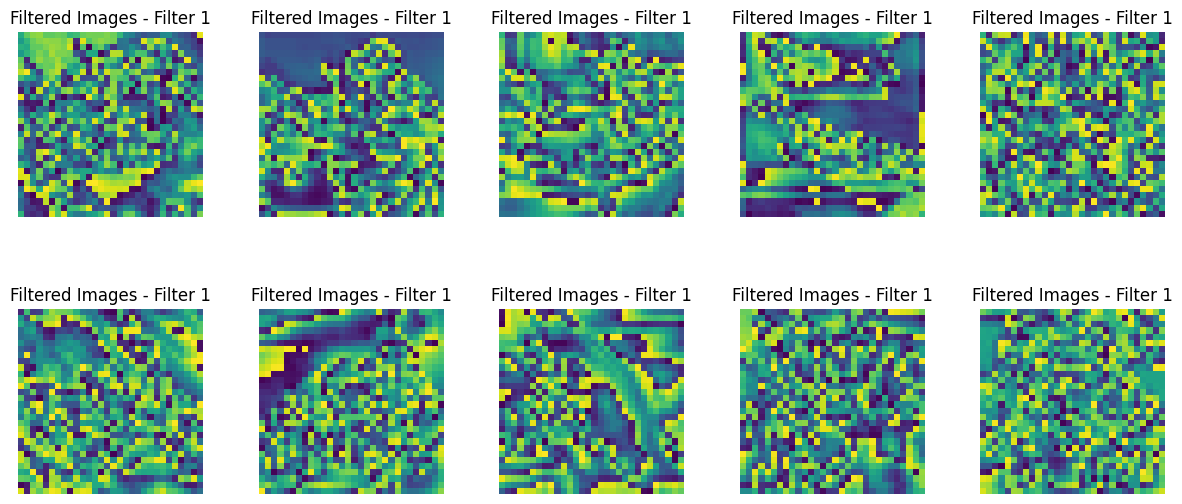

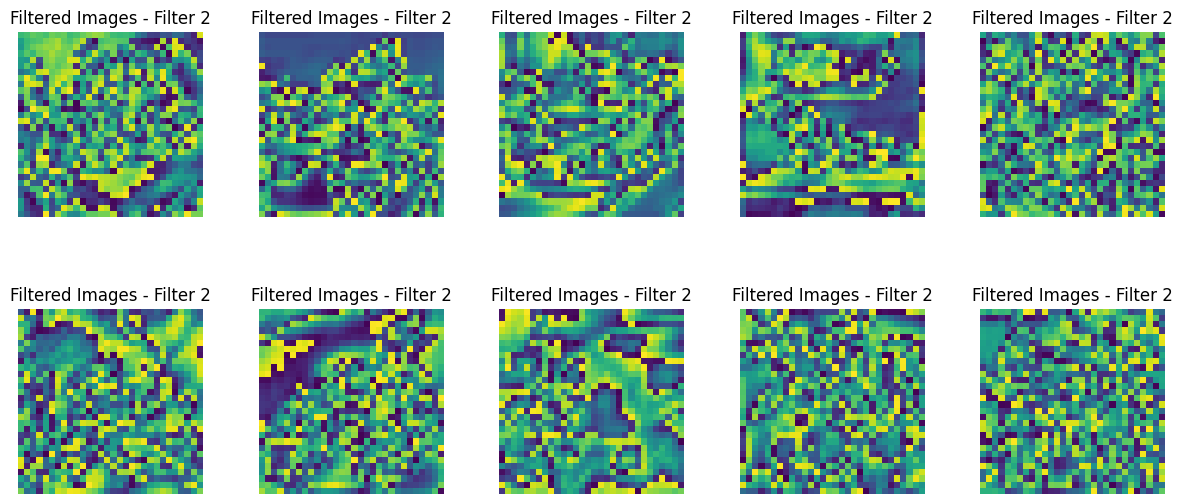

In [12]:
# Step 6: Display the images before and after applying the filters
# Function to plot images
def plot_images(images, title):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.ravel()

    for i in range(10):
        axes[i].imshow(images[i].astype('uint8'))
        axes[i].axis('off')
        axes[i].set_title(title)

    plt.subplots_adjust(hspace=0.5)
    plt.show()

# Plot original images
plot_images(images, "Original Images")

# Plot filtered images for filter 1
plot_images(filtered_images[..., 0], "Filtered Images - Filter 1")

# Plot filtered images for filter 2
plot_images(filtered_images[..., 1], "Filtered Images - Filter 2")
